資料預處理

In [1]:
from keras.utils import np_utils
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [5]:
x_train4D_normalize=x_train4D/255
x_test4D_normalize=x_test4D/255

In [6]:
y_test_onehot=np_utils.to_categorical(y_test)
y_train_onehot=np_utils.to_categorical(y_train)

建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model=Sequential()

In [9]:
model.add(Conv2D(filters=16,
                kernel_size=(5,5),
                padding='same',
                input_shape=(28,28,1),
                activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Conv2D(filters=36,
                kernel_size=(5,5),
                padding='same',
                activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Dropout(0.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=128,activation='relu'))

In [16]:
model.add(Dropout(0.5))

In [17]:
model.add(Dense(units=10,activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

訓練模型

In [19]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

In [20]:
train_history=model.fit(x=x_train4D_normalize,
                       y=y_train_onehot,epochs=10,batch_size=300,validation_split=0.2,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 41s - loss: 0.5163 - acc: 0.8366 - val_loss: 0.1016 - val_acc: 0.9701
Epoch 2/10
 - 39s - loss: 0.1377 - acc: 0.9591 - val_loss: 0.0638 - val_acc: 0.9823
Epoch 3/10
 - 38s - loss: 0.0974 - acc: 0.9707 - val_loss: 0.0514 - val_acc: 0.9850
Epoch 4/10
 - 39s - loss: 0.0798 - acc: 0.9758 - val_loss: 0.0440 - val_acc: 0.9872
Epoch 5/10
 - 37s - loss: 0.0664 - acc: 0.9794 - val_loss: 0.0407 - val_acc: 0.9889
Epoch 6/10
 - 37s - loss: 0.0589 - acc: 0.9815 - val_loss: 0.0379 - val_acc: 0.9891
Epoch 7/10
 - 37s - loss: 0.0530 - acc: 0.9835 - val_loss: 0.0404 - val_acc: 0.9885
Epoch 8/10
 - 39s - loss: 0.0490 - acc: 0.9845 - val_loss: 0.0348 - val_acc: 0.9904
Epoch 9/10
 - 37s - loss: 0.0444 - acc: 0.9859 - val_loss: 0.0325 - val_acc: 0.9908
Epoch 10/10
 - 37s - loss: 0.0402 - acc: 0.9875 - val_loss: 0.0359 - val_acc: 0.9903


In [21]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train','test'],loc='upper left')
    plt.show()

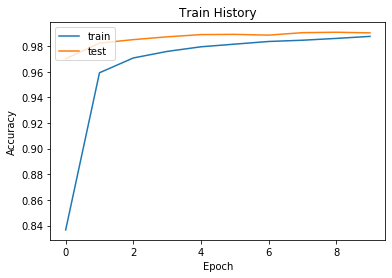

In [22]:
show_train_history('acc','val_acc')

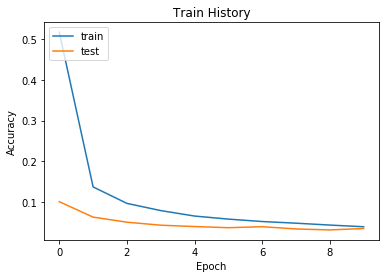

In [23]:
show_train_history('loss','val_loss')

評估模型準確率

In [24]:
scores=model.evaluate(x_test4D_normalize,y_test_onehot)
scores

10000/10000 [==============================] - 3s 269us/step


[0.025903021243623515, 0.992]

進行預測

In [25]:
prediction=model.predict_classes(x_test4D_normalize)

In [26]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
def prediction_images(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap="binary")
        ax.set_title('label='+str(labels[idx])+ 
                    ',prediction='+str(prediction[idx]),fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

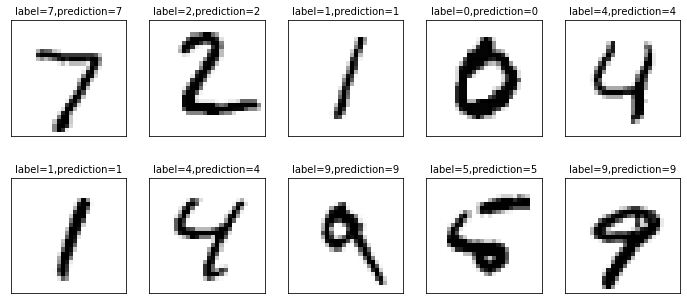

In [28]:
prediction_images(x_test,y_test,prediction,0,10)

混淆矩陣

In [29]:
import pandas as pd
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,0,0,0,0,0,2,1,1,0
1,0,1130,1,0,0,1,1,1,1,0
2,1,1,1028,0,0,0,0,1,1,0
3,0,0,0,1004,0,4,0,0,2,0
4,0,0,1,0,970,0,4,0,3,4
5,1,0,0,3,0,884,1,1,1,1
6,1,2,0,0,1,2,949,0,3,0
7,0,1,5,1,0,0,0,1014,1,6
8,1,0,1,1,0,1,0,0,970,0


In [30]:
df=pd.DataFrame({'label':y_test, 'predict':prediction})
df

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [31]:
df[(df.label==5)&(df.predict==3)]

,label,predict
2035,5,3
2597,5,3
5937,5,3
